In [1]:
import sys
sys.path.append('D:\PyCharmProjects\VFPUMC02')
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
# Jupyter Notebook 的魔法命令，用于在 Notebook 中直接显示 Matplotlib 绘制的图像。
%matplotlib inline
# 导入 Matplotlib 的 pylab 模块，用于绘图和数据可视化。
import matplotlib.pylab as plt
# 从 scikit-learn 库中导入 `make_moons` 函数，用于生成一个二维的非线性数据集（通常用于分类问题）。
from sklearn.datasets import make_moons
# 从 scikit-learn 库中导入 `DecisionTreeClassifier`，用于构建决策树分类模型。
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

In [20]:
N = 6000
# 定义总样本数量为 6000。

known_labels_ratio = 0.1
# 定义已知正样本的比例为 10%。

X, y = make_moons(n_samples=N, noise=0.1, shuffle=True)
# 使用 `make_moons` 函数生成一个二维的非线性数据集：
# - `n_samples=N`：生成 N 个样本点。
# - `noise=0.1`：为数据添加高斯噪声，噪声强度为 0.1。
# - `shuffle=True`：对生成的数据进行随机打乱。
# 返回值：
# - `X`：样本的二维坐标（形状为 (N, 2)）。
# - `y`：样本的标签（0 或 1，形状为 (N,)）。

rp = np.random.permutation(int(N/2))
# 会生成一个从 0 到 int(N/2) - 1 的随机排列

data_P = X[y==1][rp[:int(len(rp)*known_labels_ratio)]]
# 从正样本中随机选取一部分作为已知的正样本（P 数据）。
# - `X[y==1]`：提取所有正样本的坐标。
# - `rp[:int(len(rp)*known_labels_ratio)]`：从随机排列的索引中选取前 10% 的正样本。
# - `data_P`：已知的正样本数据（形状为 (N*known_labels_ratio/2, 2)）。

data_U = np.concatenate((X[y==1][rp[int(len(rp)*known_labels_ratio):]], X[y==0]), axis=0)
# 构造未标记样本（U 数据）。
# - `X[y==1][rp[int(len(rp)*known_labels_ratio):]]`：剩余的 90% 正样本。
# - `X[y==0]`：所有负样本。
# - `np.concatenate`：将剩余的正样本和所有负样本拼接在一起，形成未标记样本集 `data_U`。

print("Amount of labeled samples: %d" % (data_P.shape[0]))
# 打印已知正样本的数量，即 `data_P` 的样本数。

Amount of labeled samples: 300


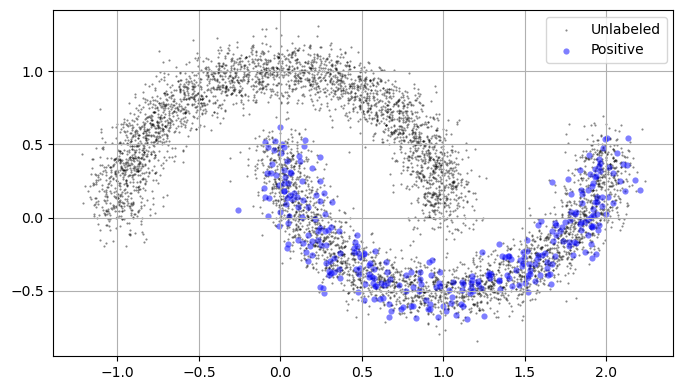

In [21]:
plt.figure(figsize=(8, 4.5))
# 创建一个新的绘图窗口，设置图像大小为 8x4.5 英寸。

plt.scatter(data_U[:, 0], data_U[:, 1], c='k', marker='.', linewidth=1, s=1, alpha=0.5, label='Unlabeled')
# 绘制未标记样本的散点图：
# - `data_U[:, 0]` 和 `data_U[:, 1]`：未标记样本的 x 和 y 坐标。
# - `c='k'`：点的颜色为黑色。
# - `marker='.'`：点的形状为小圆点。
# - `linewidth=1`：点的边框宽度为 1。
# - `s=1`：点的大小为 1。
# - `alpha=0.5`：点的透明度为 0.5。
# - `label='Unlabeled'`：图例标签为 "Unlabeled"。

plt.scatter(data_P[:, 0], data_P[:, 1], c='b', marker='o', linewidth=0, s=20, alpha=0.5, label='Positive')
# 绘制已知正样本的散点图：
# - `data_P[:, 0]` 和 `data_P[:, 1]`：已知正样本的 x 和 y 坐标。
# - `c='b'`：点的颜色为蓝色。
# - `marker='o'`：点的形状为圆形。
# - `linewidth=0`：点的边框宽度为 0。
# - `s=20`：点的大小为 20。
# - `alpha=0.5`：点的透明度为 0.5。
# - `label='Positive'`：图例标签为 "Positive"。

plt.grid()
# 添加网格线，方便观察数据分布。

plt.legend()
# 显示图例，标注 "Unlabeled" 和 "Positive" 两类点。

# 转导式 PU 学习

通过集成方法（bagging）训练了一组决策树。每棵树使用完整的正样本集和未标记样本集的一个自助采样（bootstrapped sample）进行训练。每棵树评估其袋外样本（out-of-the-bag, oob）并作出预测。这些预测被平均，从而将标签传递到整个未标记样本集。

合理的参数包括：

- T：集成中弱学习器的数量
- K：随机自助采样的大小
- 弱学习器的参数，例如树的深度、准则、特征数量等。

In [31]:
NP = data_P.shape[0]
NU = data_U.shape[0]

T = 1000
K = NP
train_label = np.zeros(shape=(NP+K,))

In [33]:
train_label.shape

(600,)